In [62]:
import os
import pandas as pd
import scipy as sci
import matplotlib.pyplot as pltdescribe

import data and process meta information

In [31]:
source_folder = os.getcwd() + "\\CodeSnippets\\Source"
files = os.listdir(source_folder)
categorie = ["HOF", "I", "LC", "R"]

df = pd.DataFrame([], columns=["Name", "Code", "Categorie"])
for idx, file in enumerate(files):
    filename, _file_extension = os.path.splitext(file)
    file_data = open(source_folder + "\\" + file, "r")
    file_data = file_data.read()
    df = df.append(pd.DataFrame([[filename, file_data, categorie[idx%4]]], columns=["Name", "Code", "Categorie"]))
    
df = df.reset_index()
df = df.drop(["index"], axis=1)
df["LOC"] = df.apply(lambda row: row["Code"].count("\n"), axis=1)
df["CPS"] = df.apply(lambda row: len(row["Code"]), axis=1)
df["LOC/CPS"] = df.apply(lambda row: row["CPS"]/row["LOC"], axis=1)

label data per categorie

In [11]:
cols = ["Categorie", "LOC-mean", "LOC-std", "CPS-mean", "LOC-std", "LOC/CPS-mean", "LOC/CPS-std"]
df_confounding = pd.DataFrame([], columns=cols)
for cat in categorie:
    data = df.loc[df["Categorie"]==cat].describe()
    df_confounding = df_confounding.append(pd.DataFrame([[cat,
                                                          data["LOC"]["mean"],
                                                          data["LOC"]["std"],
                                                          data["CPS"]["mean"],
                                                          data["CPS"]["std"],
                                                          data["LOC/CPS"]["mean"],
                                                          data["LOC/CPS"]["std"]]], columns=cols))
df_confounding.to_excel("CodeSnippets/confoudning.xlsx", index=False)

nice plots

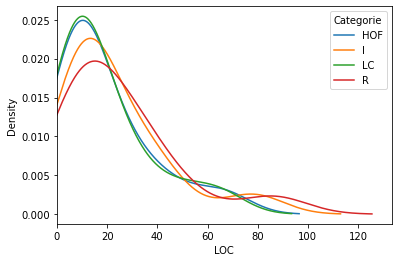

ShapiroResult(statistic=nan, pvalue=1.0)

In [66]:
df_loc = df.pivot(columns='Categorie',values='LOC')
df_loc.plot.kde()
plt.xlabel('LOC')
plt.xlim(0)
plt.show()

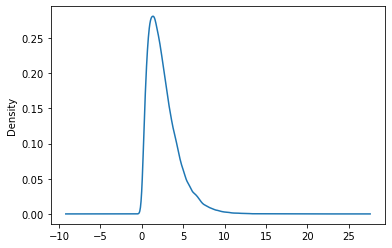

(1.9812093575102467, 1.3113754310690486)
0.0


In [76]:
import numpy as np
import pandas as pd
from scipy.stats import gamma

shape = 2.0
scale = 1.3

x = pd.Series(gamma.rvs(shape, loc = 0.0, scale=scale, size = 100000))
x.plot.kde()
plt.show()
#x = pd.Series(np.random.gamma(shape, scale=scale, size=100000))

mean = x.mean()
var  = x.var()

alpha = (mean**2)/var
beta  = alpha / mean

print((alpha, 1.0/beta)) # NB! scale is 1/beta

likelihoods = {}
likelihoods['gamma'] = x.map(lambda val: gamma.pdf(val, alpha, loc = 0.0, scale = 1.0/beta)).prod()
print(likelihoods['gamma'])

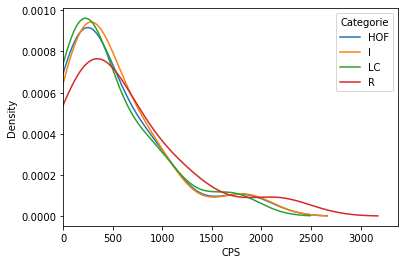

In [33]:
df_loc = df.pivot(columns='Categorie',values='CPS')
df_loc.plot.kde()
plt.xlabel('CPS')
plt.xlim(0)
plt.show()

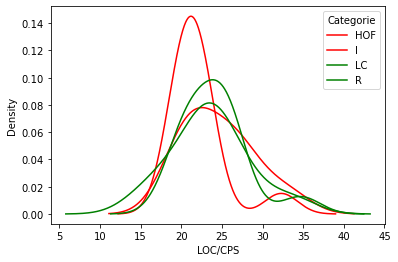

In [37]:
df_loc = df.pivot(columns='Categorie',values='LOC/CPS')
df_loc.plot.kde(color=["red", "red", "green", "green"])
plt.xlabel('LOC/CPS')
plt.show()